In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score
from sklearn.model_selection import train_test_split, GridSearchCV

In [28]:
df_train = pd.read_csv('train_data2.csv')
df_test = pd.read_csv('test_data.csv')
train_Y = df_train['poi'].map({True:1, False:0})
train_num = len(train_Y)
names = df_test['name']
df_train = df_train.drop('poi', axis = 1)
df = pd.concat([df_train, df_test])
df.head()

,name,salary,bonus,long_term_incentive,deferred_income,deferral_payments,loan_advances,other,expenses,director_fees,...,restricted_stock,restricted_stock_deferred,shared_receipt_with_poi,email_address,from_messages,from_poi_to_this_person,from_this_person_to_poi,to_messages,total_payments,total_stock_value
0,RICE KENNETH D,420636.0,1750000.0,1617011.0,-3504386.0,NaN,NaN,174839.0,46950.0,NaN,...,2748364.0,NaN,864.0,ken.rice@enron.com,18.0,42.0,4.0,905.0,505050.0,22542539.0
1,SKILLING JEFFREY K,1111258.0,5600000.0,1920000.0,NaN,NaN,NaN,22122.0,29336.0,NaN,...,6843672.0,NaN,2042.0,jeff.skilling@enron.com,108.0,88.0,30.0,3627.0,8682716.0,26093672.0
2,SHELBY REX,211844.0,200000.0,NaN,-4167.0,NaN,NaN,1573324.0,22884.0,NaN,...,869220.0,NaN,91.0,rex.shelby@enron.com,39.0,13.0,14.0,225.0,2003885.0,2493616.0
3,KOPPER MICHAEL J,224305.0,800000.0,602671.0,NaN,NaN,NaN,907502.0,118134.0,NaN,...,985032.0,NaN,NaN,michael.kopper@enron.com,NaN,NaN,NaN,NaN,2652612.0,985032.0
4,CALGER CHRISTOPHER F,240189.0,1250000.0,375304.0,-262500.0,NaN,NaN,486.0,35818.0,NaN,...,126027.0,NaN,2188.0,christopher.calger@enron.com,144.0,199.0,25.0,2598.0,1639297.0,126027.0


In [3]:
float_features = df.select_dtypes('float64').columns.tolist()

## EDA 探索式資料分析

In [4]:
df.describe().apply(lambda s: s.apply('{0:.1f}'.format))

,salary,bonus,long_term_incentive,deferred_income,deferral_payments,loan_advances,other,expenses,director_fees,exercised_stock_options,restricted_stock,restricted_stock_deferred,shared_receipt_with_poi,from_messages,from_poi_to_this_person,from_this_person_to_poi,to_messages,total_payments,total_stock_value
count,95.0,82.0,66.0,49.0,39.0,4.0,93.0,95.0,17.0,102.0,110.0,18.0,86.0,86.0,86.0,86.0,86.0,125.0,126.0
mean,562194.3,2374234.6,1470361.5,-1140475.1,1642674.2,41962500.0,919065.0,108728.9,166804.9,5987053.8,2321741.1,166410.6,1176.5,608.8,64.9,41.2,2073.9,5081526.5,6773957.5
std,2716369.2,10713328.0,5942759.3,4025406.4,5161930.0,47083208.7,4589252.9,533534.8,319891.4,31062006.6,12518278.2,4201494.3,1178.3,1841.0,87.0,100.1,2582.7,29061716.4,38957772.7
min,477.0,70000.0,69223.0,-27992891.0,-102500.0,400000.0,2.0,148.0,3285.0,3285.0,-2604490.0,-7576788.0,2.0,12.0,0.0,0.0,57.0,148.0,-44093.0
25%,211816.0,431250.0,281250.0,-694862.0,81573.0,1600000.0,1215.0,22614.0,98784.0,527886.2,254018.0,-389621.8,249.8,22.8,10.0,1.0,541.2,394475.0,494510.2
50%,259996.0,769375.0,442035.0,-159792.0,227449.0,41762500.0,52382.0,46950.0,108579.0,1310813.5,451740.0,-146975.0,740.5,41.0,35.0,8.0,1211.0,1101393.0,1102872.5
75%,312117.0,1200000.0,938672.0,-38346.0,1002671.5,82125000.0,362096.0,79952.5,113784.0,2547724.0,1002369.8,-75009.8,1888.2,145.5,72.2,24.8,2634.8,2093263.0,2949846.8
max,26704229.0,97343619.0,48521928.0,-833.0,32083396.0,83925000.0,42667589.0,5235198.0,1398517.0,311764000.0,130322299.0,15456290.0,5521.0,14368.0,528.0,609.0,15149.0,309886585.0,434509511.0


loan_advances              1.000000
exercised_stock_options    0.591972
total_stock_value          0.443098
salary                     0.371917
total_payments             0.271335
restricted_stock           0.261102
deferral_payments          0.251548
bonus                      0.242170
long_term_incentive        0.227805
Name: poi, dtype: float64

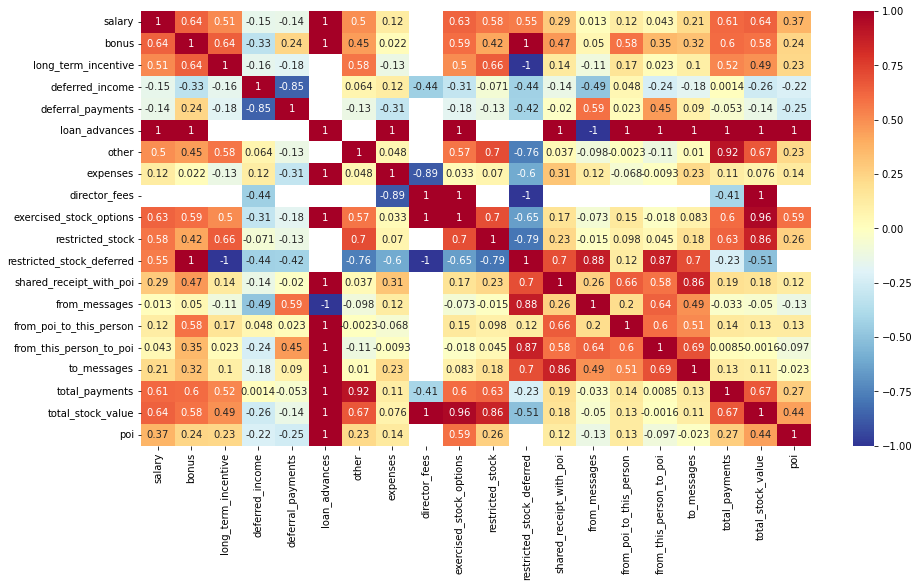

In [5]:
df_train = pd.read_csv('train_data2.csv')
plt.figure(figsize = (15,8))
sns.heatmap(df_train.corr(), cmap = plt.cm.RdYlBu_r, annot = True)
abs(df_train.corr()['poi']).sort_values(ascending = False).head(10)[1:]

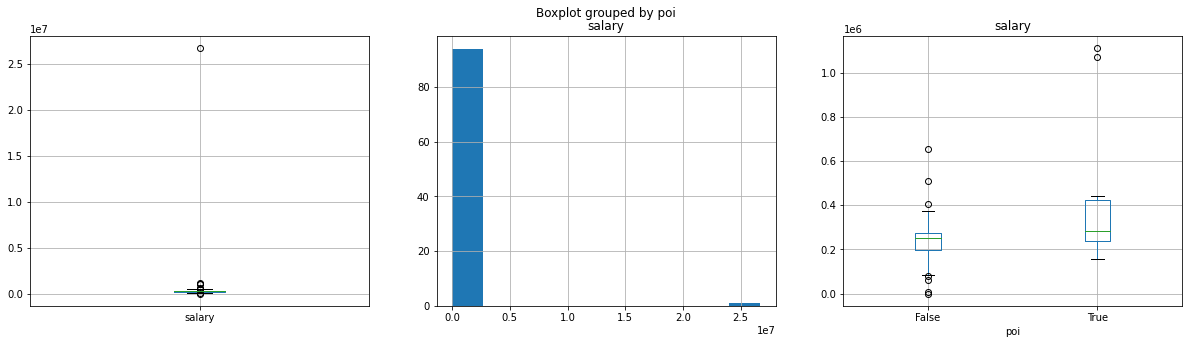

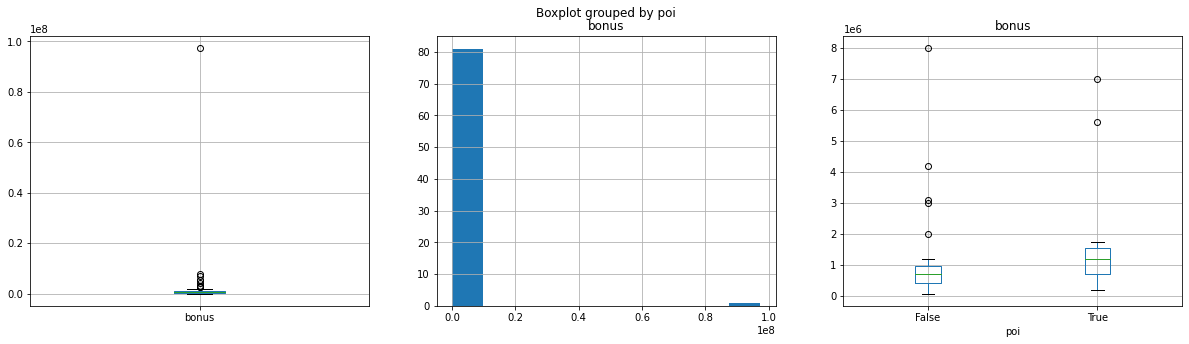

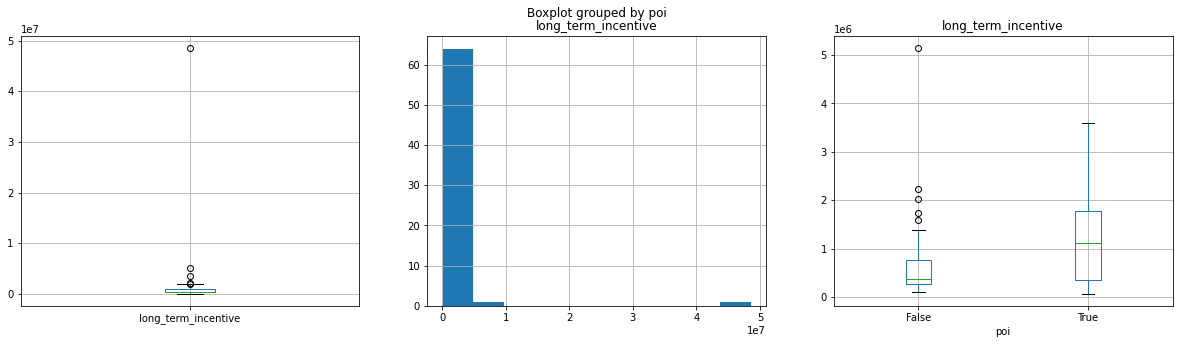

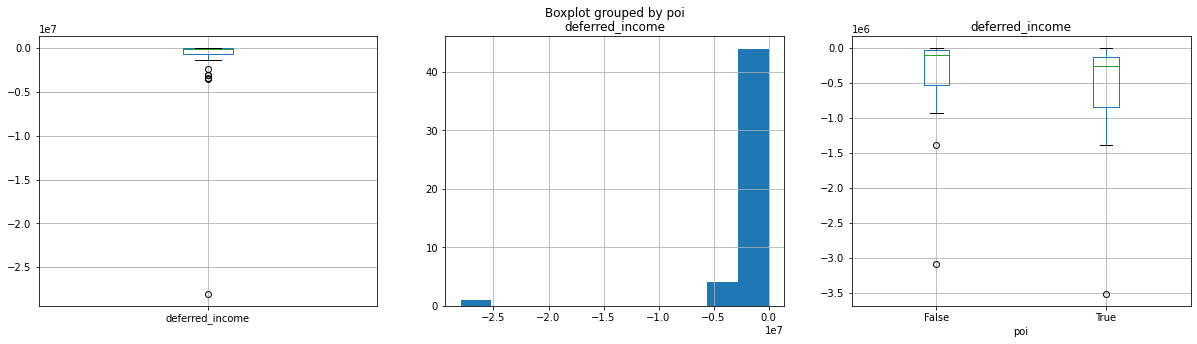

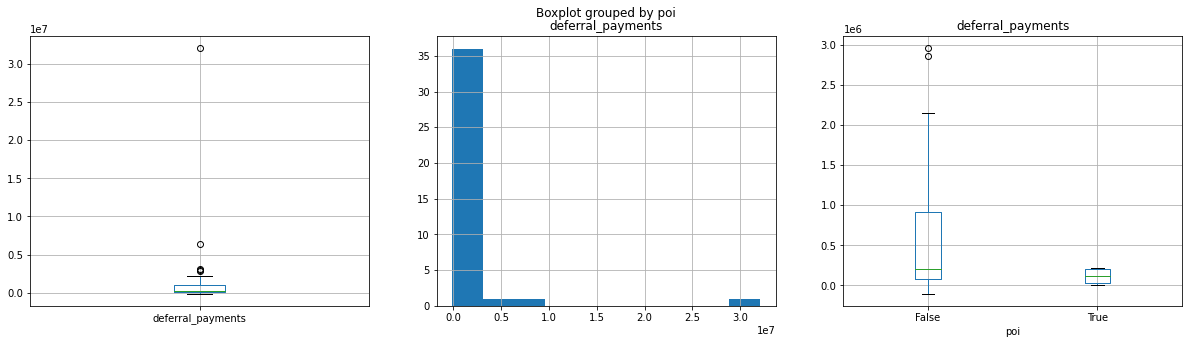

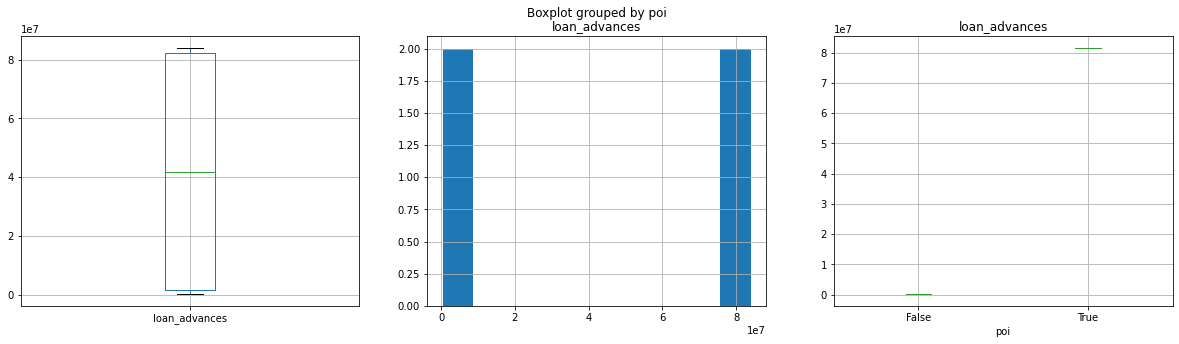

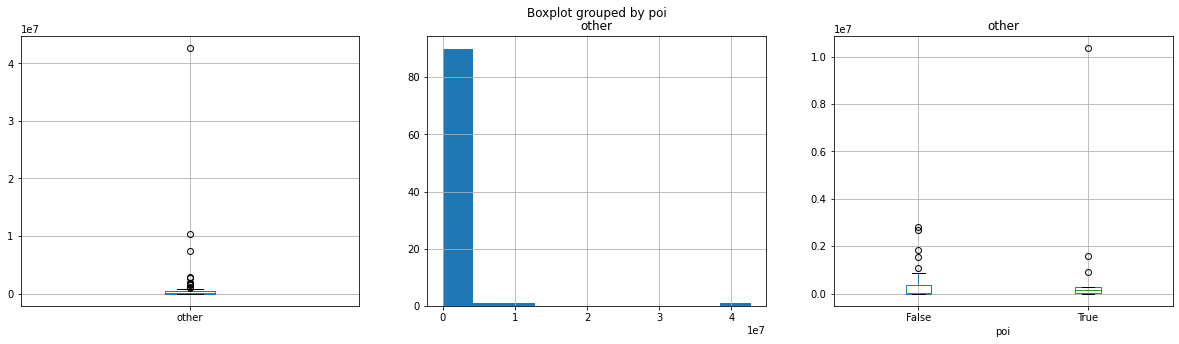

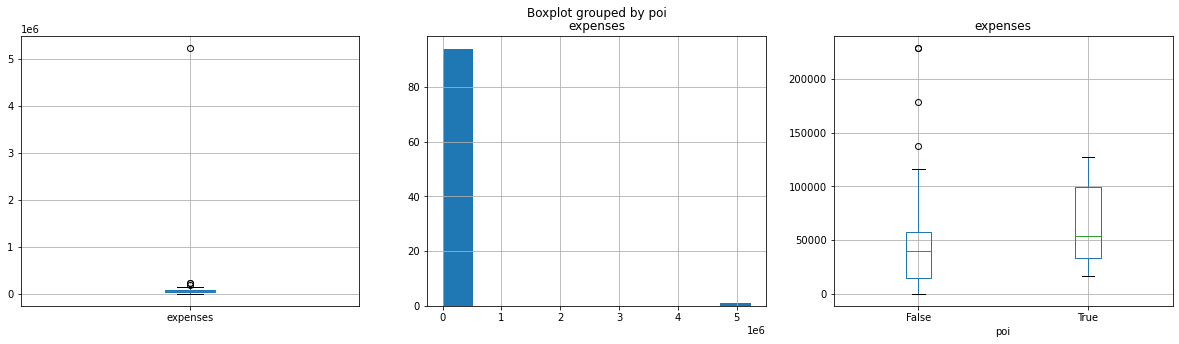

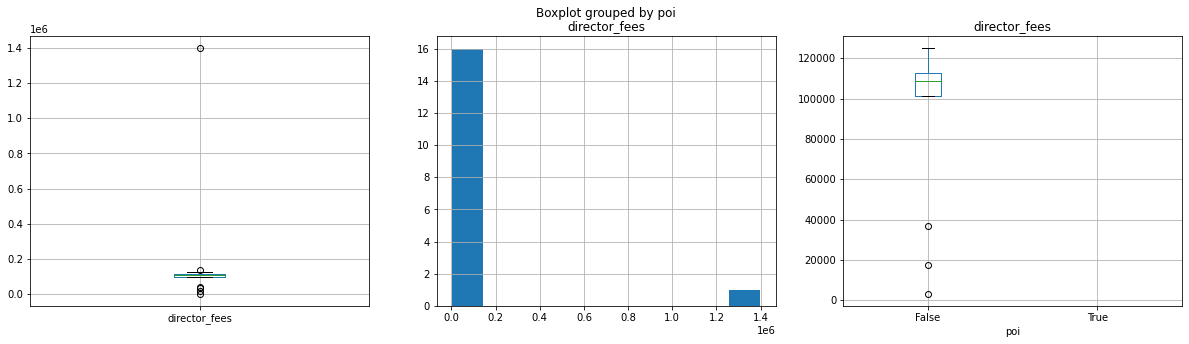

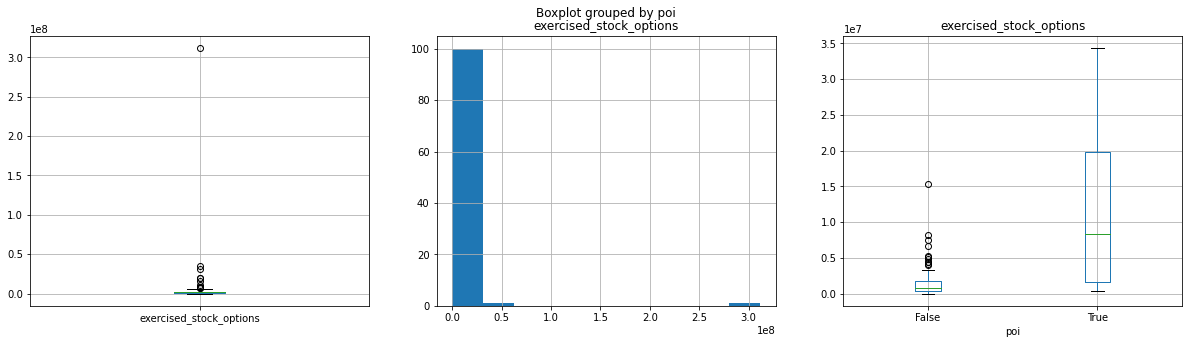

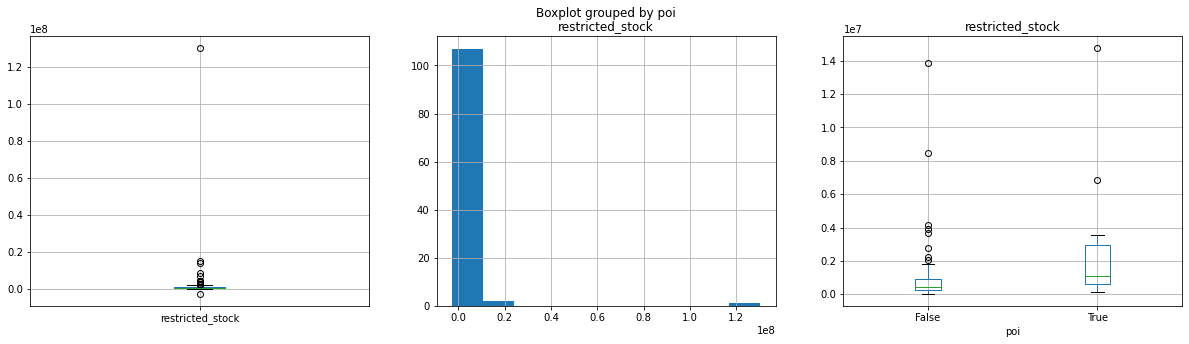

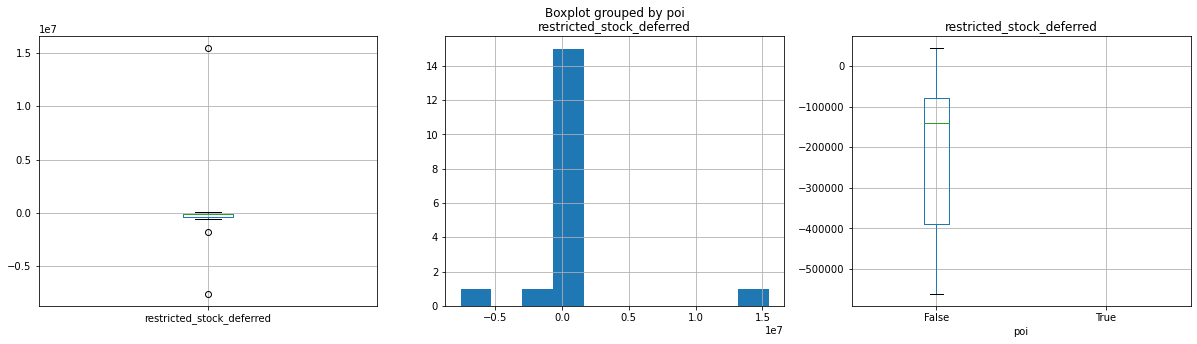

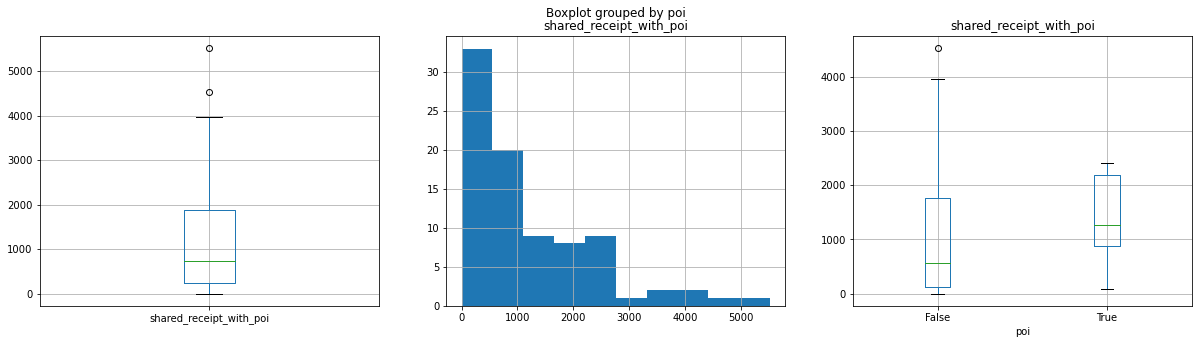

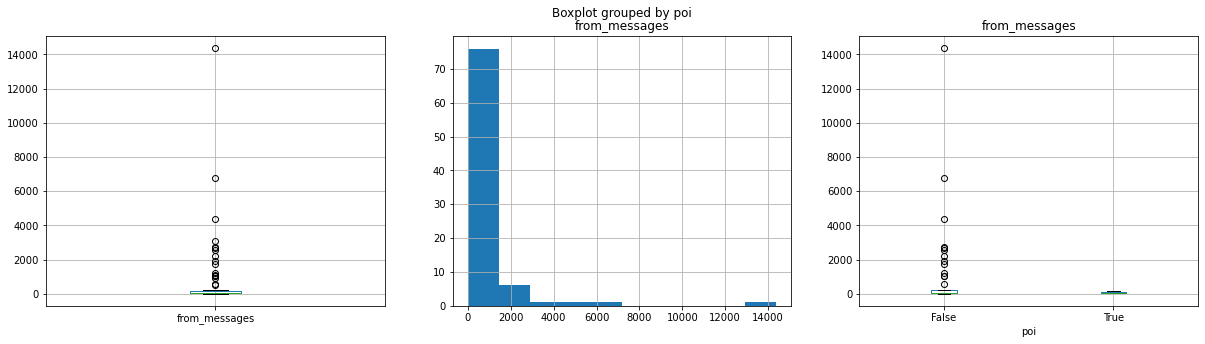

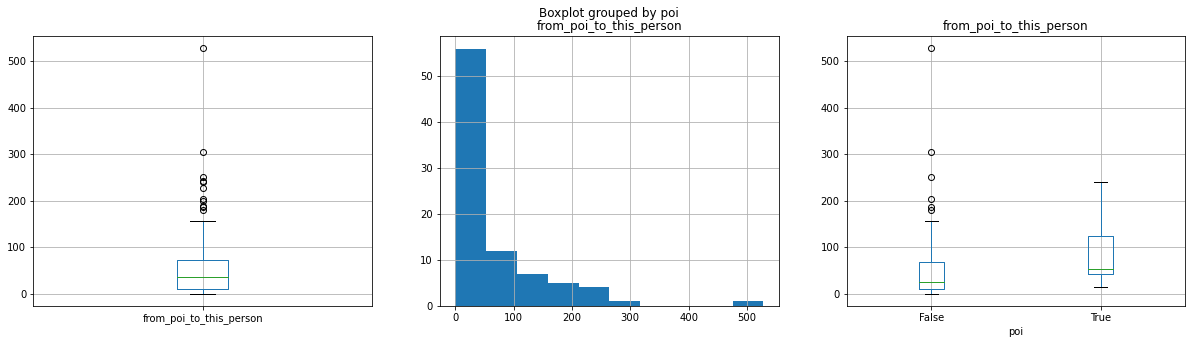

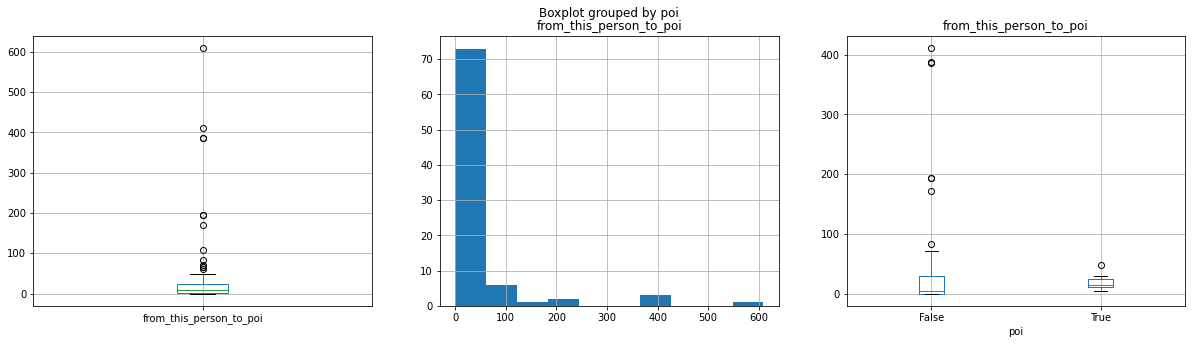

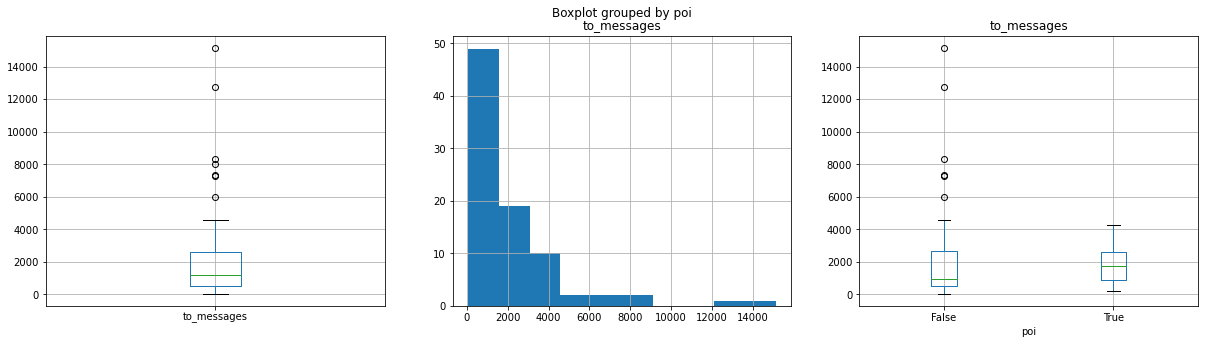

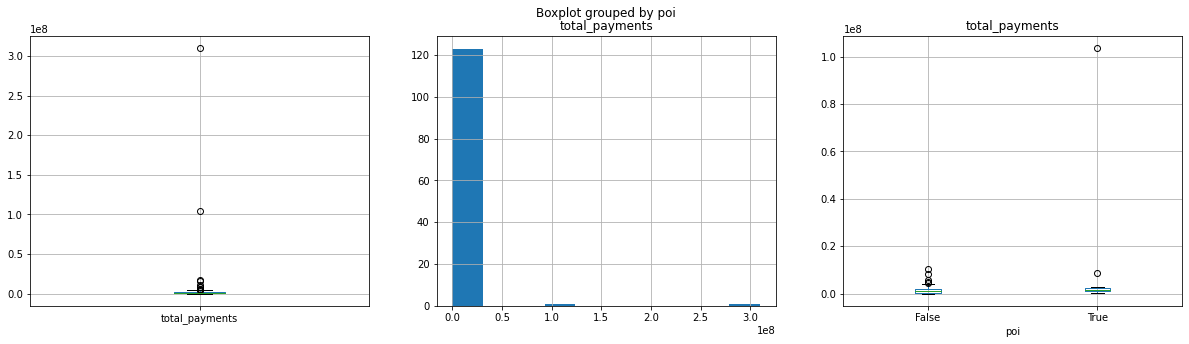

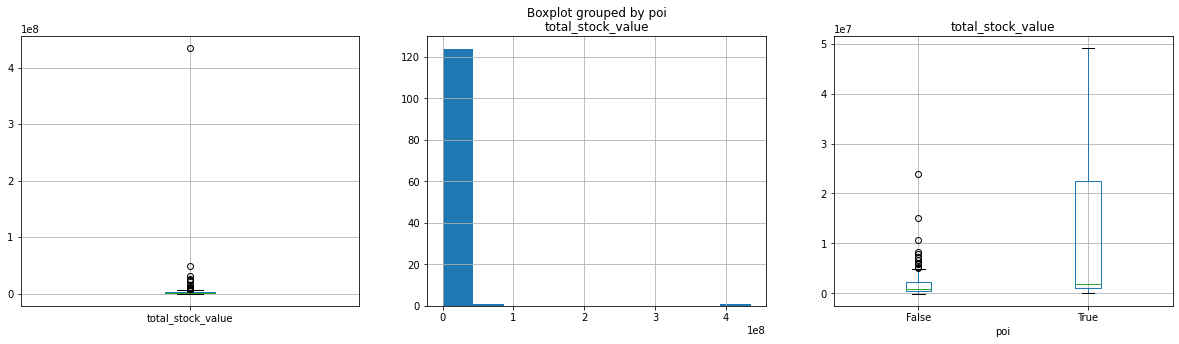

In [6]:
for col in float_features:
    fig = plt.figure(figsize = (20, 5))
    ax1 = fig.add_subplot(131)
    ax2 = fig.add_subplot(132)
    ax3 = fig.add_subplot(133)
    df.boxplot(column = col, ax = ax1)
    df.hist(column = col, ax = ax2)
    df_train.boxplot(column = col, by = 'poi', ax = ax3)
    plt.show()

## 缺失值

In [29]:
df.fillna(0, inplace = True)

## 異常值

In [30]:
for col in float_features:
    floor = np.percentile(df[col], 1)
    ceil = np.percentile(df[col], 99)
    df[col] = df[col].clip(floor, ceil)

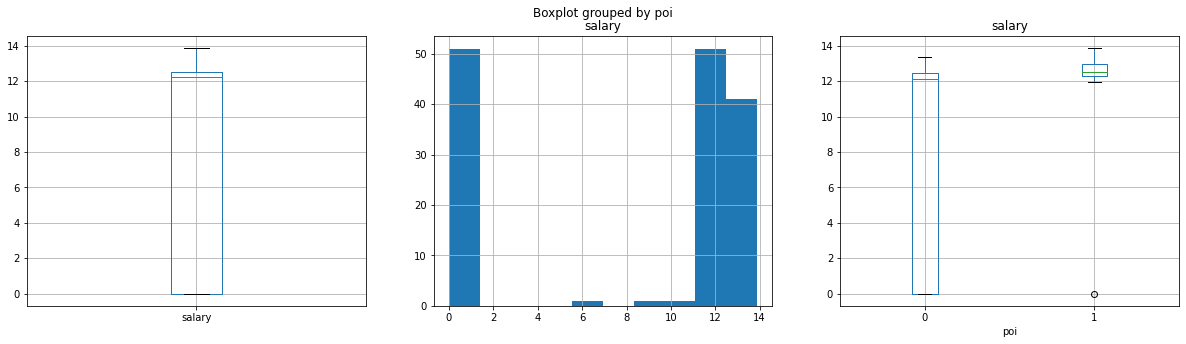

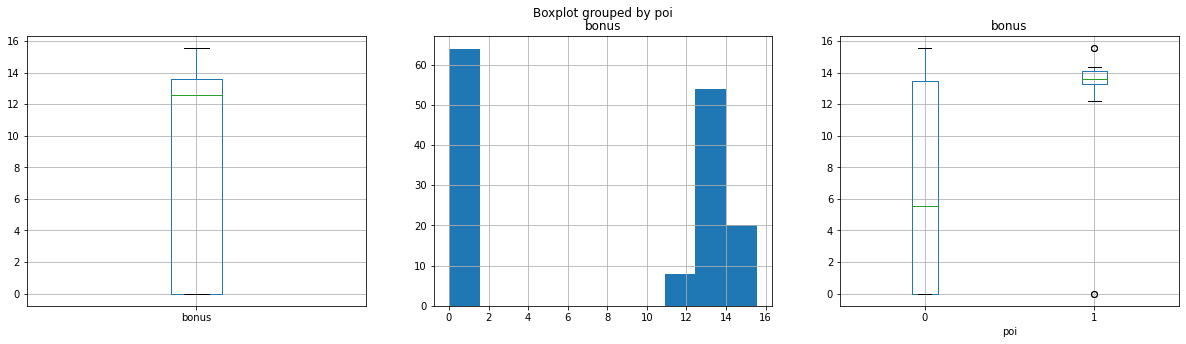

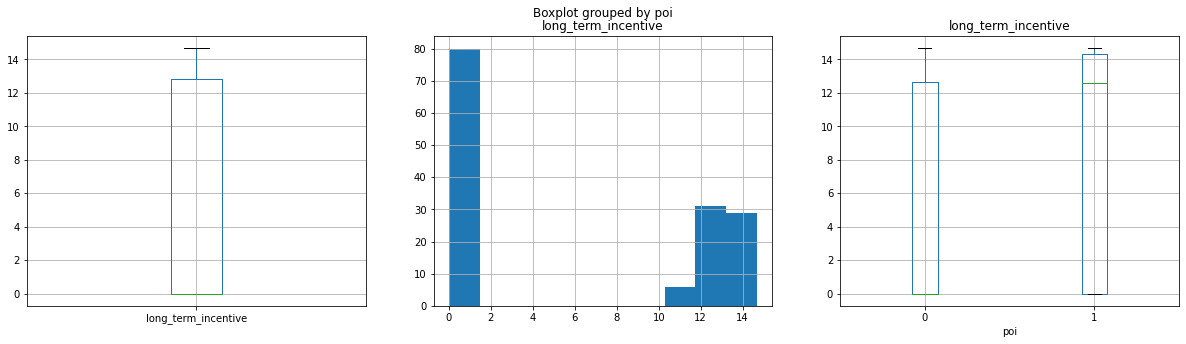

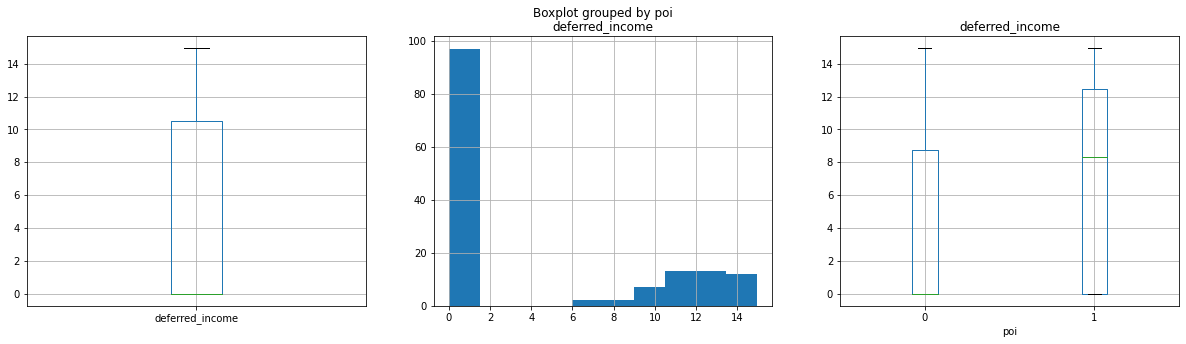

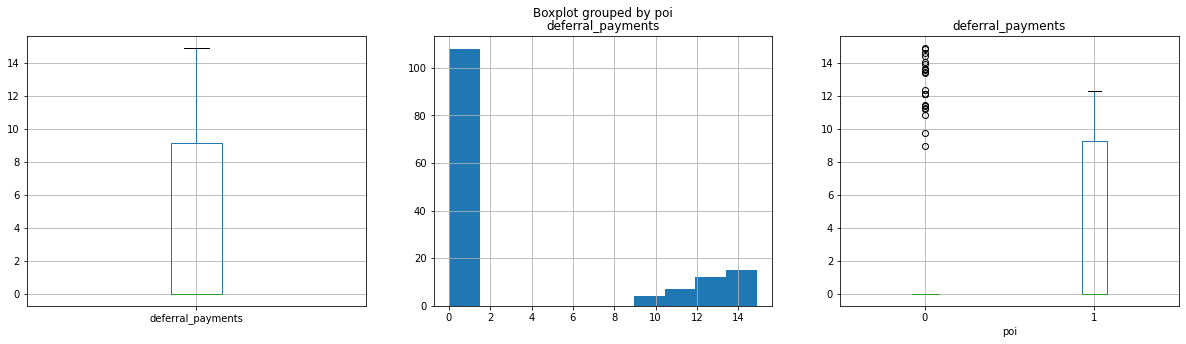

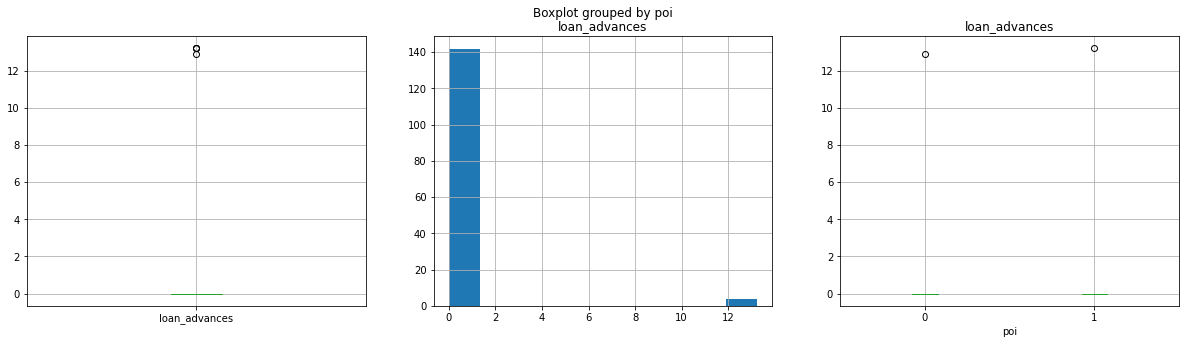

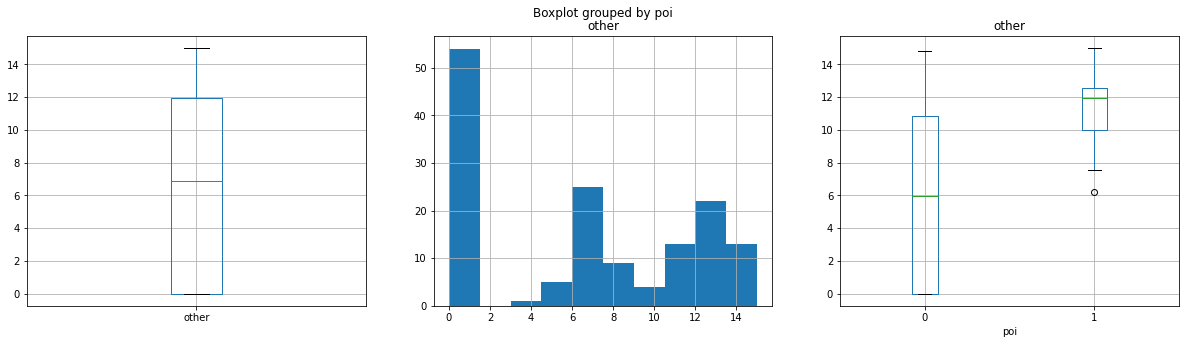

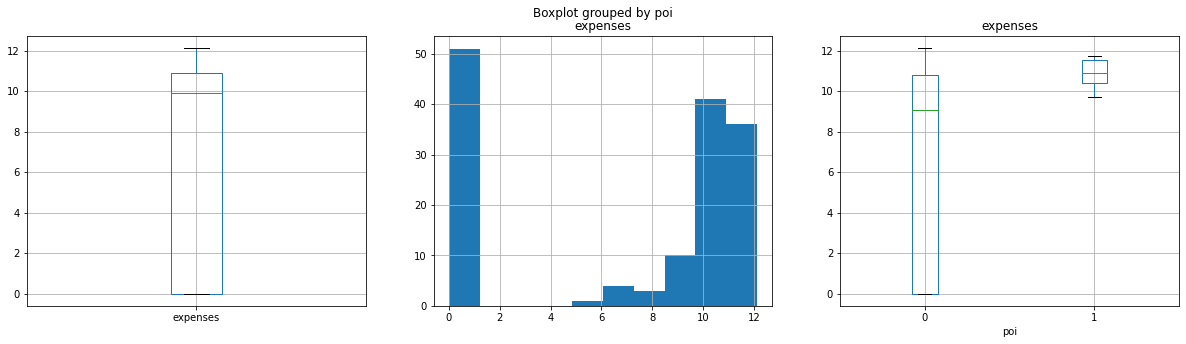

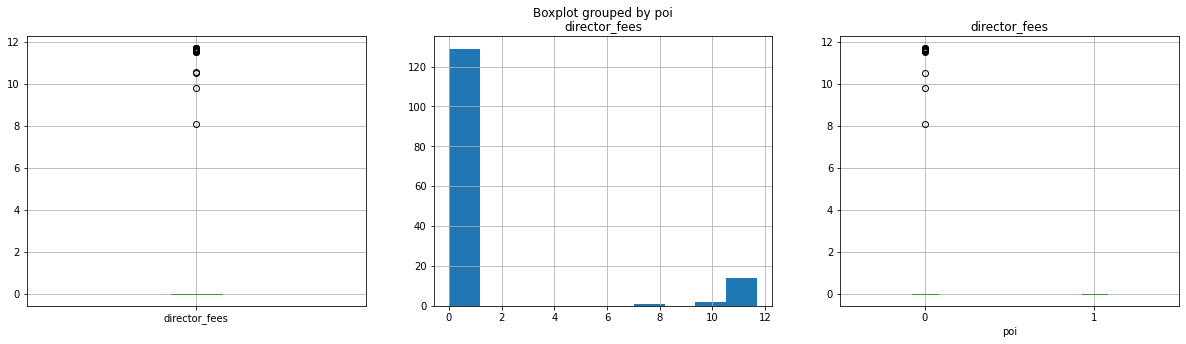

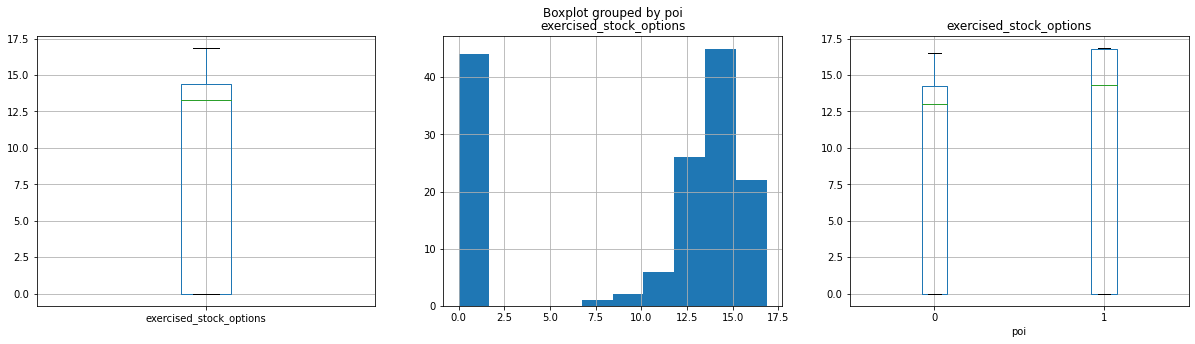

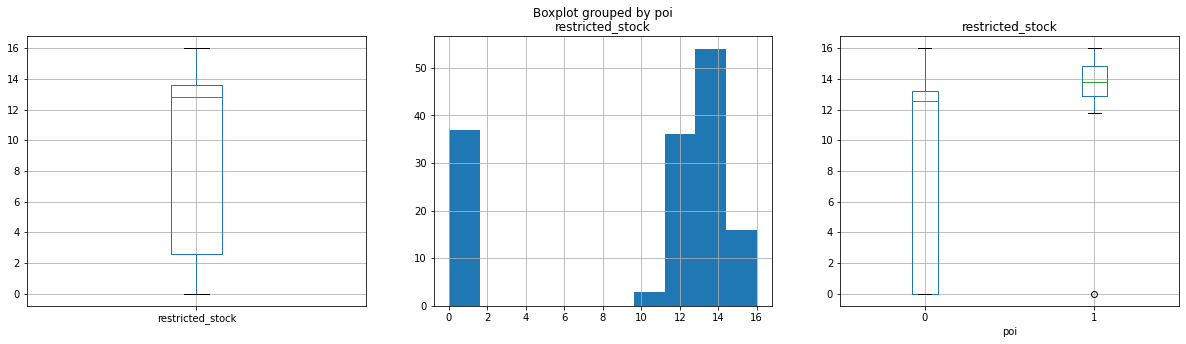

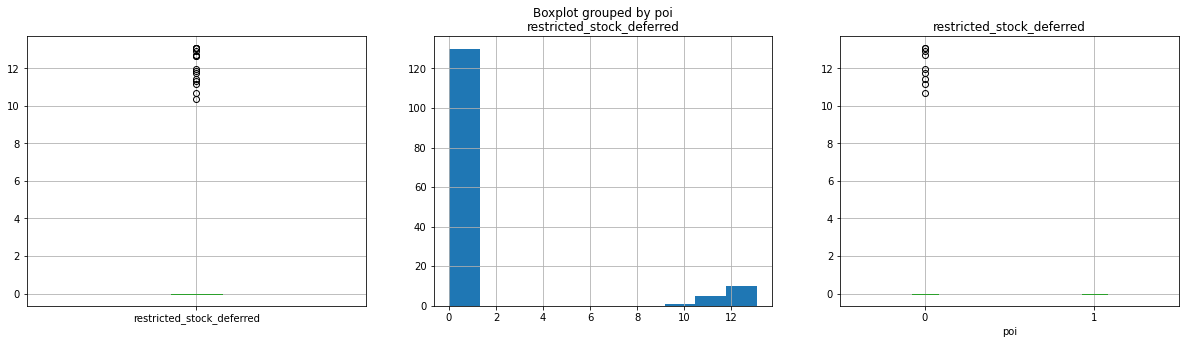

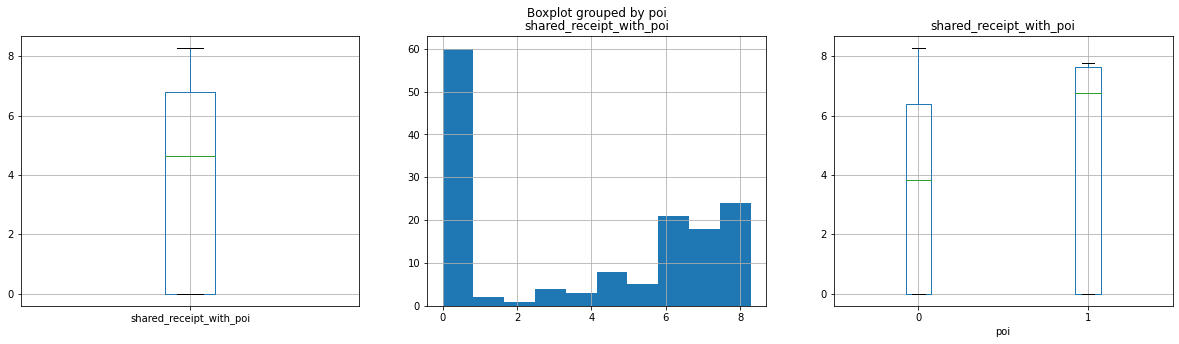

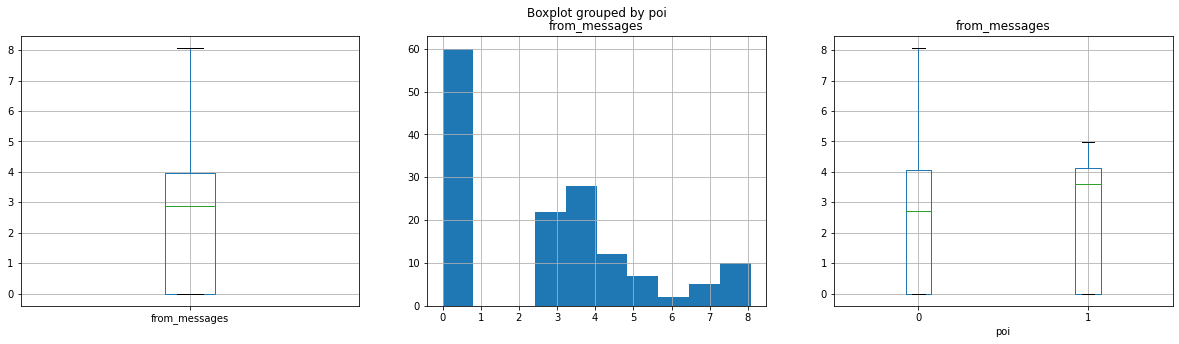

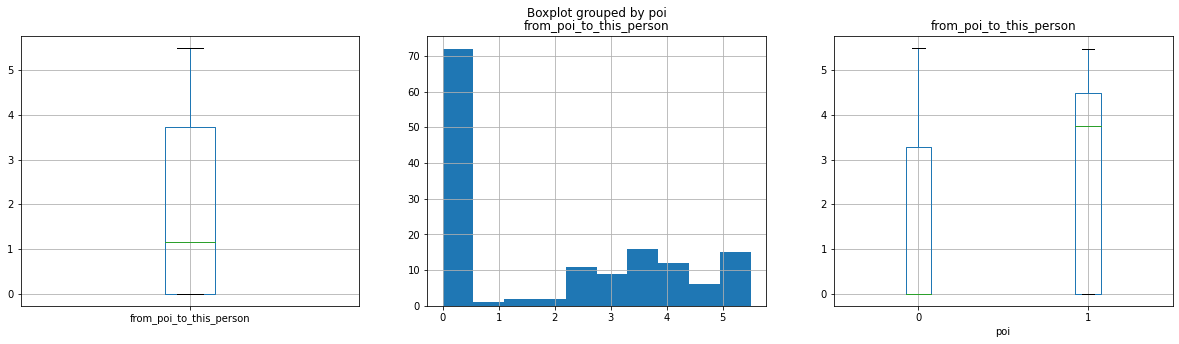

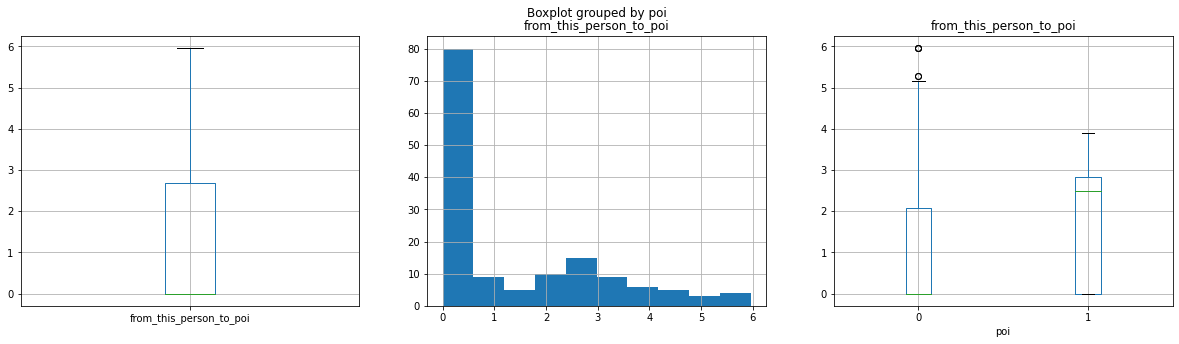

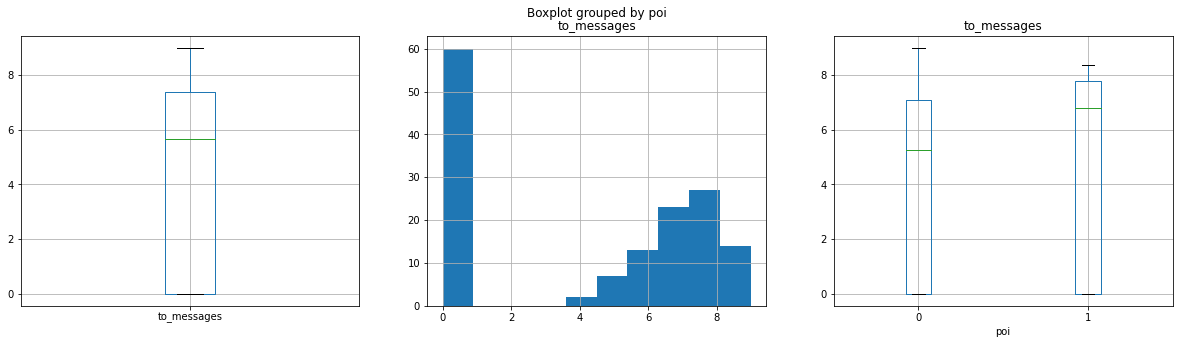

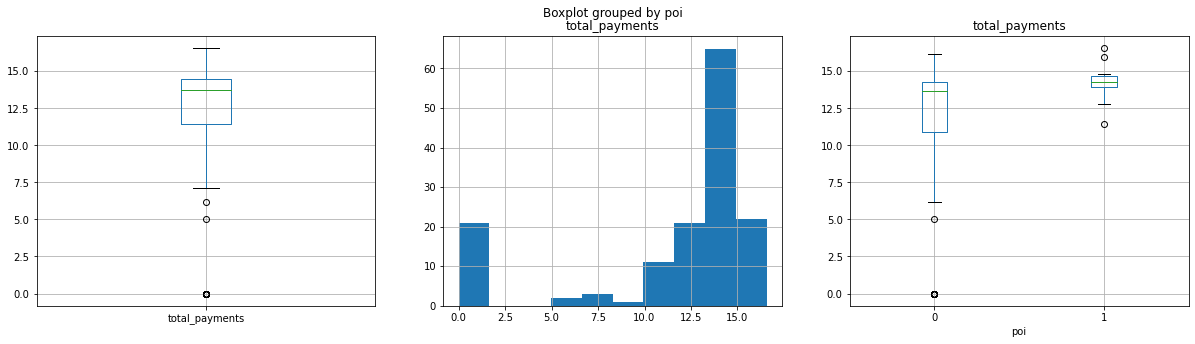

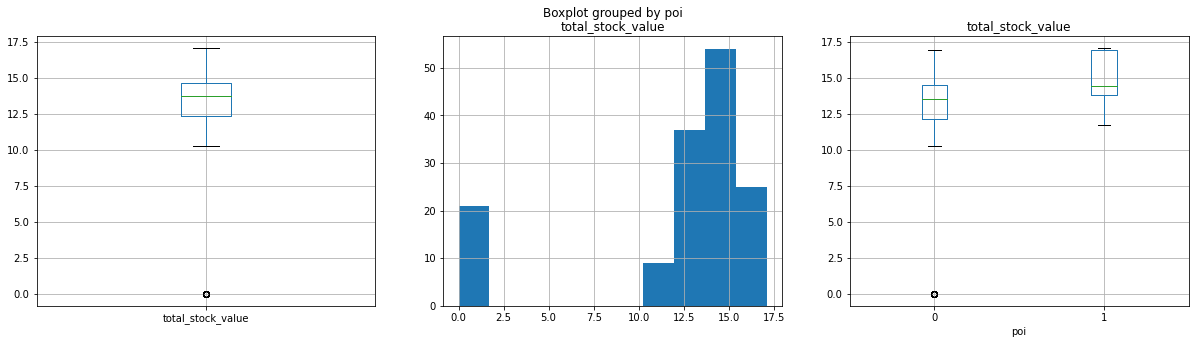

In [12]:
for col in float_features:
    fig = plt.figure(figsize = (20, 5))
    ax1 = fig.add_subplot(131)
    ax2 = fig.add_subplot(132)
    ax3 = fig.add_subplot(133)
    df.boxplot(column = col, ax = ax1)
    df.hist(column = col, ax = ax2)
    pd.concat([df[:train_num],train_Y], axis = 1).boxplot(column = col, by = 'poi', ax = ax3)
    plt.show()

## 去偏態

In [31]:
for col in float_features:
    df[col] = np.log1p(abs(df[col]))

## 編碼

In [32]:
# email_address 特徵雜湊
df['email_address_hash'] = df['email_address'].map(lambda x:hash(x) % 10)

## 特徵工程
特徵選擇、特徵建立、特徵組合

In [33]:
df['net_value_minus'] = df['total_stock_value'] - df['total_payments']
df['net_value_add'] = df['total_stock_value'] + df['total_payments']
df['messages'] = df['from_poi_to_this_person'] + df['from_this_person_to_poi'] + df['shared_receipt_with_poi']
df.drop(['name', 'email_address'], axis = 1, inplace = True)

In [34]:
# 相關係數過濾法
df_processed = pd.concat([df[:train_num],train_Y], axis = 1)
high_list_corr = abs(df_processed.corr()['poi']).sort_values(ascending = False).head(15)[1:].index.tolist()

In [35]:
# 決策樹特徵重要性
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df)
train_X = df_scaled[:train_num]

clf = DecisionTreeClassifier()
clf.fit(train_X, train_Y)
feature_importance = pd.DataFrame({'Feature' : df.columns, 'Feature importance' : clf.feature_importances_})
high_list_dt = feature_importance.sort_values(by = 'Feature importance', ascending = False).head(15).Feature.tolist()

In [36]:
# 隨機森林特徵重要性
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df)
train_X = df_scaled[:train_num]

clf = RandomForestClassifier()
clf.fit(train_X, train_Y)
feature_importance = pd.DataFrame({'Feature' : df.columns, 'Feature importance' : clf.feature_importances_})
high_list_rf = feature_importance.sort_values(by = 'Feature importance', ascending = False).head(15).Feature.tolist()

In [37]:
high_list = high_list_corr + high_list_dt + high_list_rf
high_list = list(set(high_list))

## 標準化 or 最大最小化

In [ ]:
# scaler = MinMaxScaler()
# df = scaler.fit_transform(df)

## 切分資料集

In [38]:
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df[high_list])
train_X = df_scaled[:train_num]
test_X = df_scaled[train_num:]

x_train, x_val, y_train, y_val = train_test_split(train_X, train_Y, test_size = 0.25, random_state = 42)

## 模型選擇、訓練、評估
- 分類問題
- 評估指標：AUC

In [39]:
# 使用三種模型 : 邏輯迴歸 / 梯度提升機 / 隨機森林
lr = LogisticRegression(tol=0.001, penalty='l2', fit_intercept=True, C=1.0)
gdbt = GradientBoostingClassifier(tol=100, subsample=0.75, n_estimators=250, max_features=20,
                                  max_depth=6, learning_rate=0.03)
rf = RandomForestClassifier(n_estimators=200, min_samples_split=2, min_samples_leaf=1, 
                            max_features='sqrt', max_depth=6, bootstrap=True)

In [40]:
# 邏輯迴歸預測檔
lr.fit(x_train, y_train)
y_pred = lr.predict_proba(x_val)[:,1]
y_pred_binarized = np.where(y_pred > 0.5, 1, 0)
auc = roc_auc_score(y_val, y_pred)
acc = accuracy_score(y_val, y_pred_binarized)
f1 = f1_score(y_val, y_pred_binarized)
print('auc score: ', auc)
print('accuracy score: ', acc)
print('f1 score: ', f1)
lr.fit(train_X, train_Y)
lr_pred = lr.predict_proba(test_X)[:,1]
sub = pd.DataFrame({'name': names, 'poi': lr_pred})
sub.to_csv('EnronFraud_lr_submission.csv', index=False) 

auc score:  0.8416666666666666
accuracy score:  0.8275862068965517
f1 score:  0.0


In [41]:
# 梯度提升機預測檔
gdbt.fit(x_train, y_train)
y_pred = gdbt.predict_proba(x_val)[:,1]
y_pred_binarized = np.where(y_pred > 0.5, 1, 0)
auc = roc_auc_score(y_val, y_pred)
acc = accuracy_score(y_val, y_pred_binarized)
f1 = f1_score(y_val, y_pred_binarized)
print('auc score: ', auc)
print('accuracy score: ', acc)
print('f1 score: ', f1)
gdbt.fit(train_X, train_Y)
gdbt_pred = gdbt.predict_proba(test_X)[:,1]
sub = pd.DataFrame({'name': names, 'poi': gdbt_pred})
sub.to_csv('EnronFraud_gdbt_submission.csv', index=False)

auc score:  0.7166666666666667
accuracy score:  0.8620689655172413
f1 score:  0.5


In [42]:
# 隨機森林預測檔
rf.fit(x_train, y_train)
y_pred = rf.predict_proba(x_val)[:,1]
y_pred_binarized = np.where(y_pred > 0.5, 1, 0)
auc = roc_auc_score(y_val, y_pred)
acc = accuracy_score(y_val, y_pred_binarized)
f1 = f1_score(y_val, y_pred_binarized)
print('auc score: ', auc)
print('accuracy score: ', acc)
print('f1 score: ', f1)
rf.fit(train_X, train_Y)
rf_pred = rf.predict_proba(test_X)[:,1]
sub = pd.DataFrame({'name': names, 'poi': rf_pred})
sub.to_csv('EnronFraud_rf_submission.csv', index=False)

auc score:  0.85
accuracy score:  0.8620689655172413
f1 score:  0.33333333333333337


## 超參數調整

In [24]:
# 設定要訓練的超參數組合
n_estimators = [100, 200, 300]
min_samples_split = [1, 2, 3]
min_samples_leaf = [1, 2]
max_depth = [3, 5, 6, 7]
param_grid = dict(n_estimators = n_estimators, min_samples_split = min_samples_split, min_samples_leaf = min_samples_leaf, max_depth = max_depth)

## 建立搜尋物件，放入模型及參數組合字典 (n_jobs=-1 會使用全部 cpu 平行運算)
grid_search = GridSearchCV(rf, param_grid, scoring="accuracy", n_jobs=-1, verbose=1)
# 開始搜尋最佳參數
grid_result = grid_search.fit(x_train, y_train)
# 預設會跑 5-fold cross-validadtion，總共 9 種參數組合，總共要 train 27 次模型
rf_bestparam = RandomForestClassifier(n_estimators = grid_result.best_params_['n_estimators'], 
                            min_samples_split = grid_result.best_params_['min_samples_split'], 
                            min_samples_leaf = grid_result.best_params_['min_samples_leaf'], 
                            max_features='sqrt', 
                            max_depth=grid_result.best_params_['max_depth'], 
                            bootstrap=True)

# 訓練模型
rf_bestparam.fit(x_train, y_train)
# 預測測試集
y_pred = rf_bestparam.predict_proba(x_val)[:,1]
y_pred_binarized = np.where(y_pred > 0.5, 1, 0)
auc = roc_auc_score(y_val, y_pred)
acc = accuracy_score(y_val, y_pred_binarized)
f1 = f1_score(y_val, y_pred_binarized)
print('auc score: ', auc)
print('accuracy score: ', acc)
print('f1 score: ', f1)
print(grid_result.best_score_)
rf_bestparam.fit(train_X, train_Y)
rf_pred = rf_bestparam.predict_proba(test_X)[:,1]
sub = pd.DataFrame({'name': names, 'poi': rf_pred})
sub.to_csv('EnronFraud_rf2_submission.csv', index=False)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


/Users/muse33/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
120 fits failed out of a total of 360.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
120 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/muse33/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/muse33/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py", line 476, in fit
    trees = Parallel(
  File "/Users/muse33/opt/anaconda3/lib/python3.9/site-packages/joblib/parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator)

auc score:  0.8166666666666667
accuracy score:  0.8620689655172413
f1 score:  0.33333333333333337


## 集成學習

In [ ]:
# blending
blending_pred = gdbt_pred*0.5 + rf_pred*0.5
sub = pd.DataFrame({'name': names, 'poi': blending_pred})
sub.to_csv('EnronFraud_blending_submission.csv', index=False)

In [ ]:
# stacking
from mlxtend.classifier import StackingClassifier
meta_estimator = GradientBoostingClassifier(tol=100, subsample=0.70, n_estimators=50, 
                                           max_features='sqrt', max_depth=4, learning_rate=0.3)
stacking = StackingClassifier(classifiers=[lr, gdbt, rf], meta_classifier=meta_estimator, use_probas=True, average_probas=False)
stacking.fit(train_X, train_Y)
stacking_pred = stacking.predict_proba(test_X)[:,1]
sub = pd.DataFrame({'name': names, 'poi': stacking_pred})
sub.to_csv('EnronFraud_stacking_submission.csv', index=False)